# Correlation Matrix

In [1]:
from datetime import datetime
import pandas as pd
from mwdata import correlation_matrix
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
df = pd.DataFrame(data.data, columns=list(data.feature_names))
df['target'] = data.target

In [3]:
#Bin values
df['AGE'] = df['AGE'].map(lambda x: "young" if x < 29 else "old")
df['ZN'] = df['ZN'].astype(int)

df['CRIM'] = df['CRIM'].map(lambda x: "low" if x < df.CRIM.median() else "high")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,low,18,2.31,0.0,0.538,6.575,old,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,low,0,7.07,0.0,0.469,6.421,old,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,low,0,7.07,0.0,0.469,7.185,old,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,low,0,2.18,0.0,0.458,6.998,old,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,low,0,2.18,0.0,0.458,7.147,old,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Default

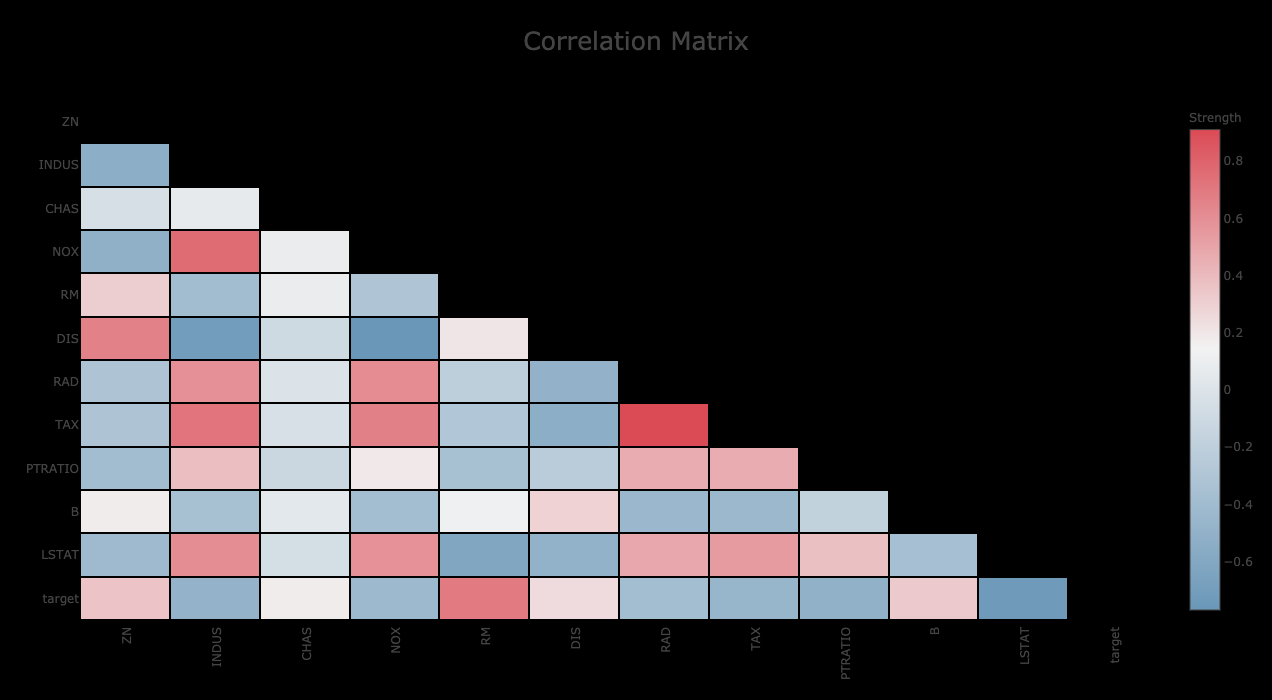

In [5]:
correlation_matrix(df)

## Enable clustering

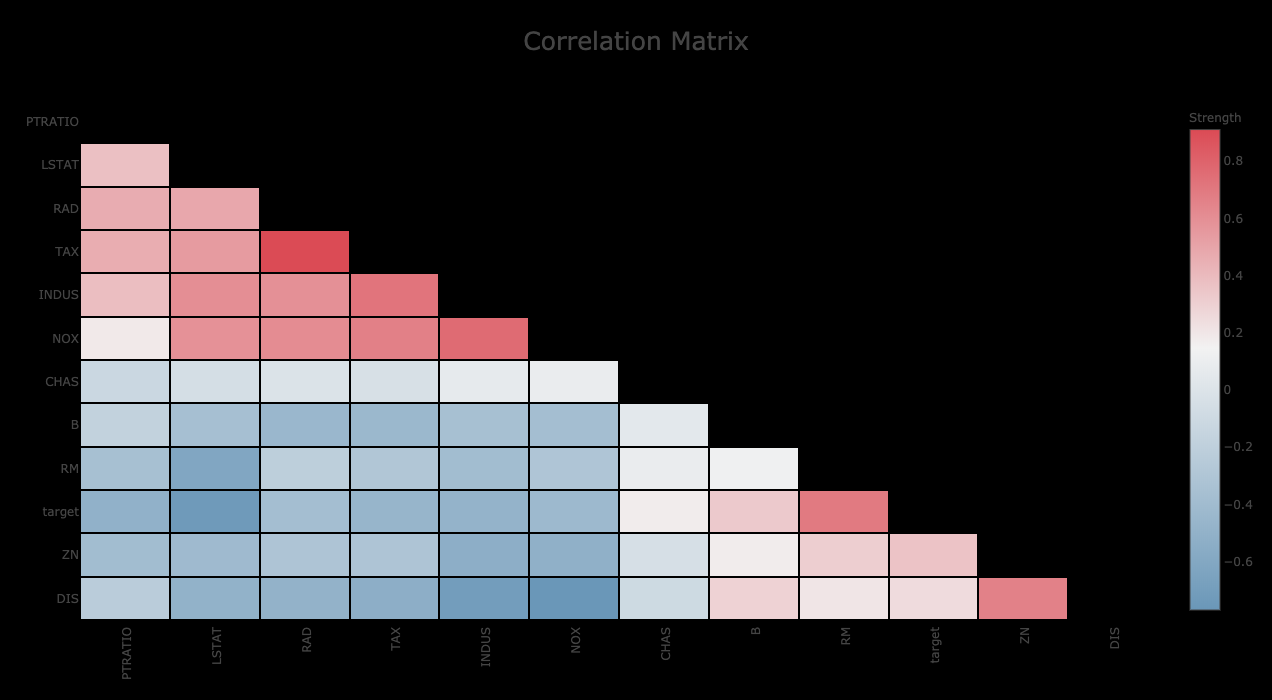

In [6]:
correlation_matrix(df, cluster=True)

## Show categorical features
**WARNING**: When using categorical features, the matrix represents strength of association (i.e. in the scale [0, 1]). This is because it is hard to define the meaning of a *negative association* involving a categorical feature.

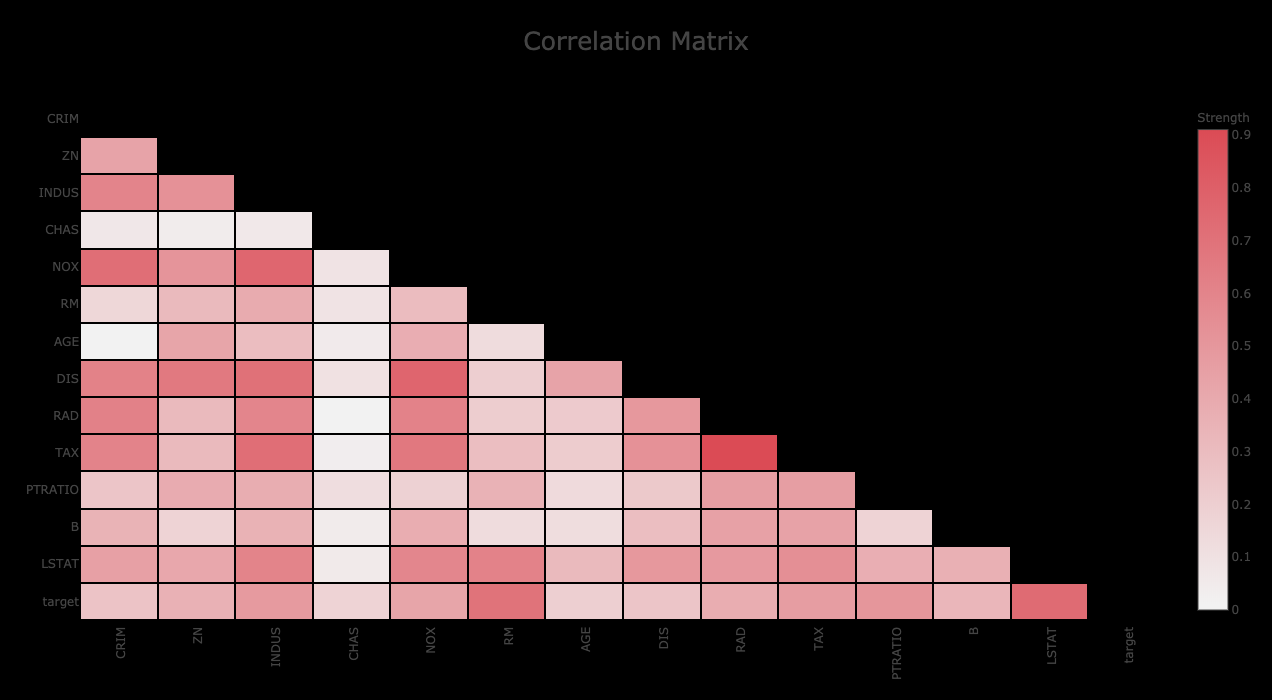

In [7]:
correlation_matrix(df, categorical=True)

## Return values only

In [8]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
correlation_matrix(df, cluster=True, categorical=True, return_values=True).columns

Index(['CHAS', 'AGE', 'B', 'PTRATIO', 'RM', 'LSTAT', 'target', 'ZN', 'RAD',
       'TAX', 'CRIM', 'INDUS', 'NOX', 'DIS'],
      dtype='object')